<a href="https://colab.research.google.com/github/AyushK-101/AyushK-101/blob/main/Student%20Admission%20Data%20Analysis/StudentAdmissionEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

adm_df=pd.read_csv('/content/adm_data.csv')

In [37]:
adm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [38]:
adm_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [39]:

adm_df.corr()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Chance of admit is highly based on TOEFL/GRE scores and CGPA

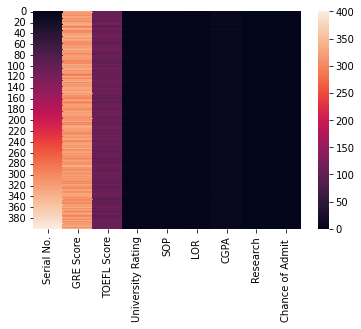

In [40]:
sns.heatmap(adm_df)

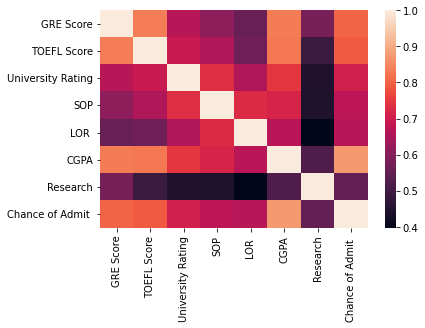

In [41]:
#dropping serial number 
adm1_df=adm_df.drop('Serial No.',axis=1)
#heatmap to see correlation
sns.heatmap(adm1_df.corr())

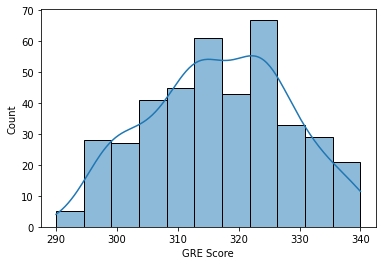

In [42]:
#plots of parameters
sns.histplot(x="GRE Score", data=adm_df,kde=True)

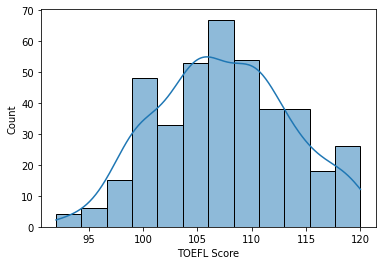

In [43]:
sns.histplot(x="TOEFL Score", data=adm_df,kde=True)

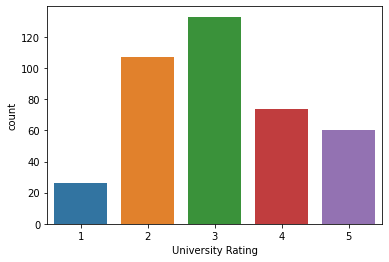

In [44]:
sns.countplot(x=adm_df['University Rating'])

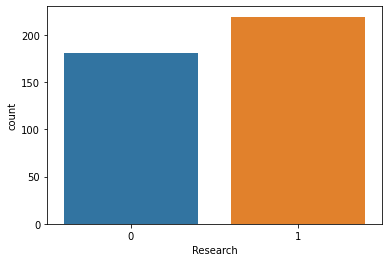

In [45]:
sns.countplot(x=adm_df['Research'])

Research doesn't matter that much for admission, but we should check if that's the case for highly ranked universities

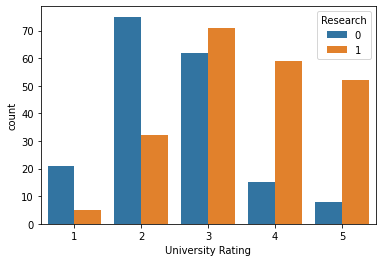

In [46]:
#countplot for universities taking research into consideration
sns.countplot(x=adm_df['University Rating'],hue=adm_df['Research'])

So highly ranked universitites get more research included applications

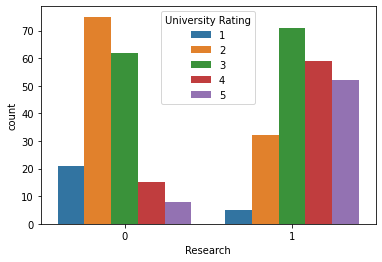

In [47]:
sns.countplot(x=adm_df['Research'],hue=adm_df['University Rating'])

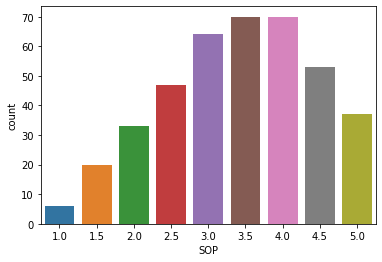

In [48]:
#countplot for SOP and LOR
sns.countplot(x='SOP',data=adm_df)

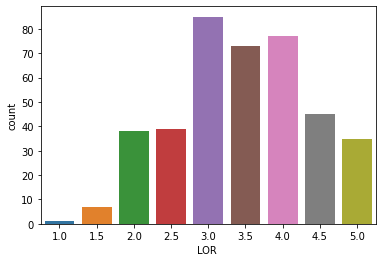

In [49]:
sns.countplot(x='LOR ',data=adm_df)

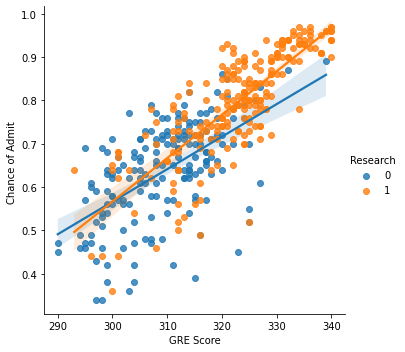

In [50]:
#corr between 'Chance of Admit' & other paramaters taking 'Research' into consideration
sns.lmplot(x='GRE Score',y='Chance of Admit ',data=adm_df,hue='Research')

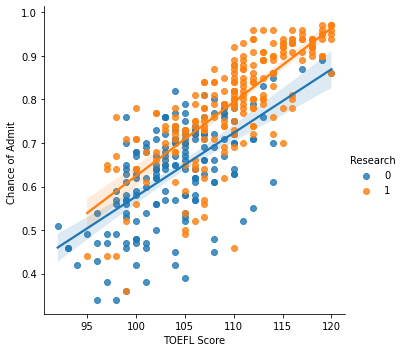

In [51]:
sns.lmplot(x='TOEFL Score',y='Chance of Admit ',data=adm_df,hue='Research')

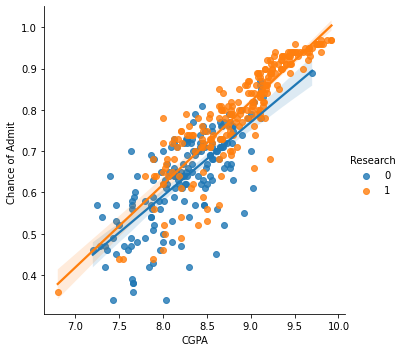

In [52]:
sns.lmplot(x='CGPA',y='Chance of Admit ',data=adm_df,hue='Research')

So, CGPA and TOEFL/GRE scores are the most important factors for admission, and you have a much higher chance of admission if you have done research work, specially for hihgly ranked universities

In [62]:
#importing prediction models
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

In [63]:
#split data
X=adm_df.drop(['Chance of Admit '],axis=1)
y=adm_df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred1 = lr.predict(X_test)

Score For Train Data : 0.8157123222604523
Score For Test Data : 0.8212241793299226
The mean absolute error: 0.04994339166543273
The mean squared error: 0.004616592264723962
The root mean squared error: 0.0679455095258249




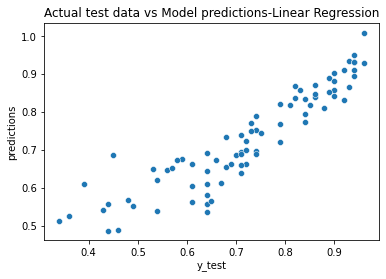

In [65]:
print('Score For Train Data : {}'.format(lr.score(X_train,y_train)))
print('Score For Test Data : {}'.format(lr.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred1))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred1))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))
print('\n')


sns.scatterplot(x=y_test, y=pred1);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions-Linear Regression')
plt.show()

In [66]:
rfreg = RandomForestRegressor(n_estimators = 100)
rfreg.fit(X_train,y_train)
pred2 = rfreg.predict(X_test)

Score For Train Data : 0.9735981002913505
Score For Test Data : 0.8535504300551524
The mean absolute error: 0.04306374999999997
The mean squared error: 0.0037818198749999983
The root mean squared error: 0.061496502949354756




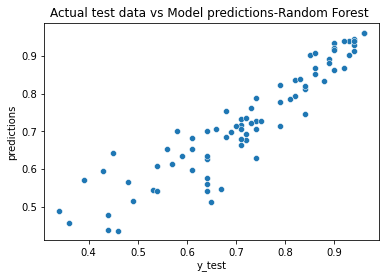

In [67]:
print('Score For Train Data : {}'.format(rfreg.score(X_train,y_train)))
print('Score For Test Data : {}'.format(rfreg.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred2))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred2))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred2);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions-Random Forest ')
plt.show()

In [68]:
xgb_reg = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10)
xgb_reg.fit(X_train,y_train)
pred3 = xgb_reg.predict(X_test)

[11:23:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Score For Train Data : 0.3832738464309574
Score For Test Data : 0.5050431524326802
The mean absolute error: 0.10063939115405082
The mean squared error: 0.012781448549847996
The root mean squared error: 0.11305506866057796




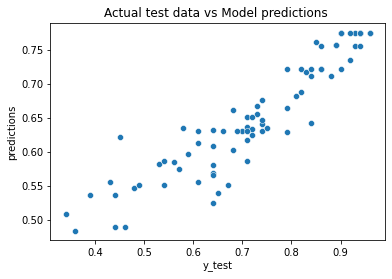

In [71]:
print('Score For Train Data : {}'.format(xgb_reg.score(X_train,y_train)))
print('Score For Test Data : {}'.format(xgb_reg.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred3))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred3))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))
print('\n')

sns.scatterplot(x=y_test, y=pred3);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

So, Random Forest is the best standard predicitve model, followed by Linear Regression